In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
# Load datasets 

run1_results = pd.read_csv(r'C:\Users\admin\Desktop\projects\Imputation_Fairness\Results\run_3000_5000\results\run_1_results.csv')


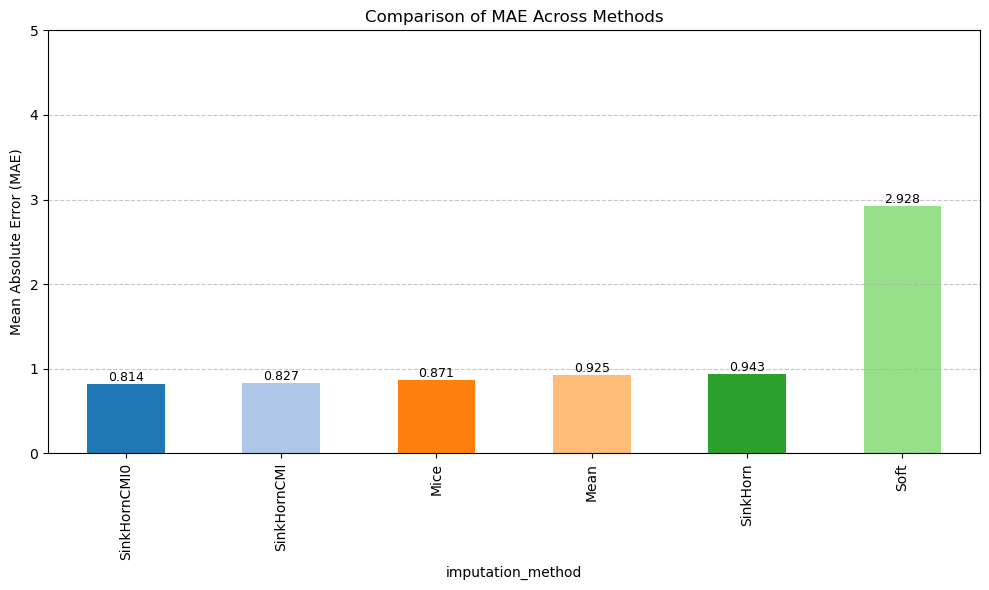

In [3]:
# Load only the first file

# Filter out rows where train_triplet is 0
run1_filtered = run1_results[run1_results.iloc[:, 2] != 0]

# Calculate MAE grouped by method
mae_run1_by_method = run1_filtered.groupby(run1_results.columns[0])[run1_results.columns[4]].mean()


# Plot with different colors and updated title
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20.colors  # A colormap with many distinct colors
sorted_mae = mae_run1_by_method.sort_values()
ax = sorted_mae.plot(kind='bar', color=colors[:len(sorted_mae)])

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.ylabel("Mean Absolute Error (MAE)")
plt.ylim(0,5)
plt.title("Comparison of MAE Across Methods")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

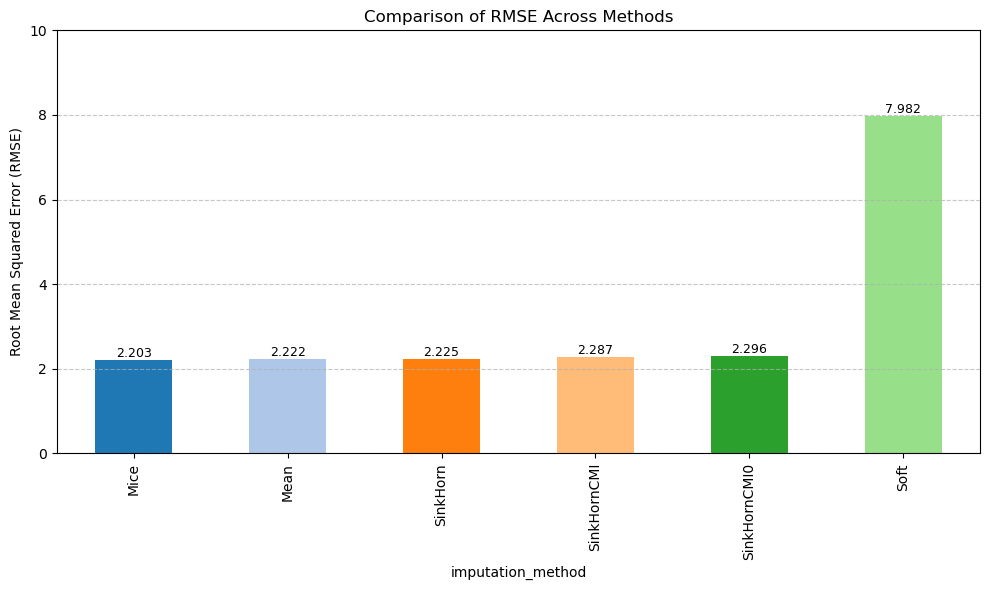

In [4]:
# Calculate RMSE grouped by method 

# Filter out rows where train_triplet is 0
run1_filtered = run1_results[run1_results.iloc[:, 2] != 0]

rmse_run1_by_method = run1_filtered.groupby(run1_results.columns[0])[run1_results.columns[5]].mean()

# Plot with different colors and updated title
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20.colors
sorted_rmse = rmse_run1_by_method.sort_values()
ax = sorted_rmse.plot(kind='bar', color=colors[:len(sorted_rmse)])

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.ylabel("Root Mean Squared Error (RMSE)")
plt.ylim(0, 10)
plt.title("Comparison of RMSE Across Methods")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [5]:
run1_method1_original_cmi  = [
    0.042453828280981765,
    0.005343502582639048,
    0.023372122016407926,
    0.014793167901508197,
    0.0576045861398935,
    0.01952437373388083,
    0.013511088149297246,
    0.033702510841358446
]

run1_method2_original_cmi = [
    0.04245382852956325,
    0.005343502675713818,
    0.0233721220340235,
    0.014793168640701904,
    0.05760458606371177,
    0.0195243742564859,
    0.013511088288567397,
    0.0337025110298117
]

run1_method3_original_cmi = [
    0.04245382852956503,
    0.005343502675720924,
    0.02337212203403105,
    0.014793168640708787,
    0.05760458606371088,
    0.019524374256486787,
    0.013511088288567397,
    0.03370251102981259
]

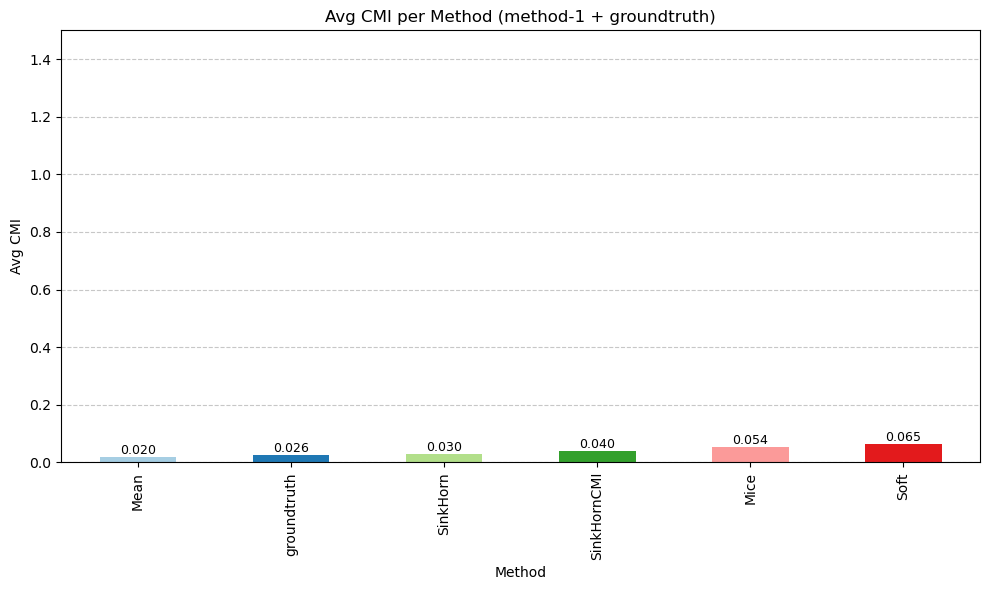

In [6]:

# Compute mean CMI from original method-1
groundtruth_mean = np.mean(run1_method1_original_cmi)

# Step 0: Base conditions: train_triplet ≠ 0 and cmi-method = method-1
base_mask = (run1_results.iloc[:, 2] != 0) & (run1_results.iloc[:, 6] == "method-1")

# Step 1: Define detailed masks
sinkhorncmi0_mask = (run1_results.iloc[:, 0] == "SinkHornCMI0") & base_mask & (run1_results.iloc[:, 1] == 1)
sinkhorncmi_mask = (run1_results.iloc[:, 0] == "SinkHornCMI") & base_mask & (run1_results.iloc[:, 1] == 1)
other_methods_mask = (~run1_results.iloc[:, 0].isin(["SinkHornCMI", "SinkHornCMI0"])) & base_mask

# Apply filters
filtered_run1_results = pd.concat([
    run1_results[sinkhorncmi0_mask],
    run1_results[sinkhorncmi_mask],
    run1_results[other_methods_mask]
])

# Group by method and compute mean CMI 
mean_cmi_by_method = filtered_run1_results.groupby(filtered_run1_results.columns[0])[filtered_run1_results.columns[7]].mean()

# Add groundtruth row
mean_cmi_by_method["groundtruth"] = groundtruth_mean

# Sort results
sorted_cmi = mean_cmi_by_method.sort_values()

# Plotting
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired.colors
ax = sorted_cmi.plot(kind='bar', color=colors[:len(sorted_cmi)])

# Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.ylabel("Avg CMI")
plt.xlabel("Method")
plt.ylim(0, 1.5)
plt.title("Avg CMI per Method (method-1 + groundtruth)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

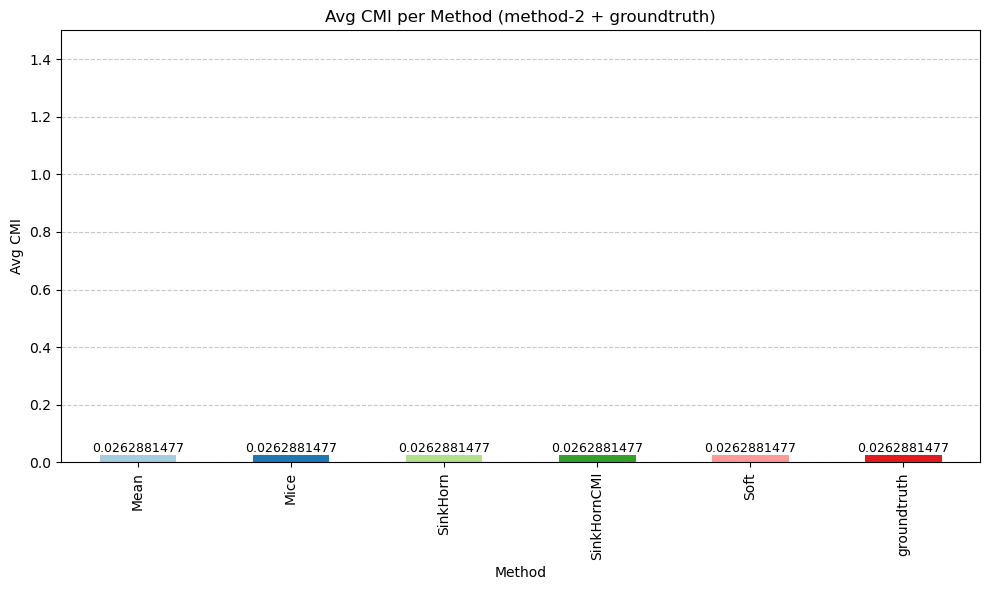

In [7]:
# # Compute mean of ground-truth CMI for method-2
# groundtruth_mean = np.mean(run1_method2_original_cmi)

# # Step 0: Base condition: train_triplet ≠ 0 and cmi-method == "method-2"
# base_mask = (run1_results.iloc[:, 2] != 0) & (run1_results.iloc[:, 6] == "method-2")

# # Step 1: Specific masks
# sinkhorncmi0_mask = (run1_results.iloc[:, 0] == "SinkHornCMI0") & base_mask & (run1_results.iloc[:, 1] == 2)
# sinkhorncmi_mask = (run1_results.iloc[:, 0] == "SinkHornCMI") & base_mask & (run1_results.iloc[:, 1] == 2)
# other_methods_mask = (~run1_results.iloc[:, 0].isin(["SinkHornCMI", "SinkHornCMI0"])) & base_mask

# # Apply filters
# filtered_run1_results = pd.concat([
#     run1_results[sinkhorncmi0_mask],
#     run1_results[sinkhorncmi_mask],
#     run1_results[other_methods_mask]
# ])

# # Group by method and calculate mean of CMI 
# mean_cmi_by_method = filtered_run1_results.groupby(filtered_run1_results.columns[0])[filtered_run1_results.columns[7]].mean()

# # Add groundtruth entry
# mean_cmi_by_method["groundtruth"] = groundtruth_mean

# # Sort and plot
# sorted_cmi = mean_cmi_by_method.sort_values()

# plt.figure(figsize=(10, 6))
# colors = plt.cm.Paired.colors
# ax = sorted_cmi.plot(kind='bar', color=colors[:len(sorted_cmi)])

# # Add value labels
# for p in ax.patches:
#     height = p.get_height()
#     ax.annotate(f'{height:.10f}', (p.get_x() + p.get_width() / 2., height),
#                 ha='center', va='bottom', fontsize=9)

# plt.ylabel("Avg CMI")
# plt.xlabel("Method")
# plt.ylim(0, 1.5)
# plt.title("Avg CMI per Method (method-2 + groundtruth)")
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

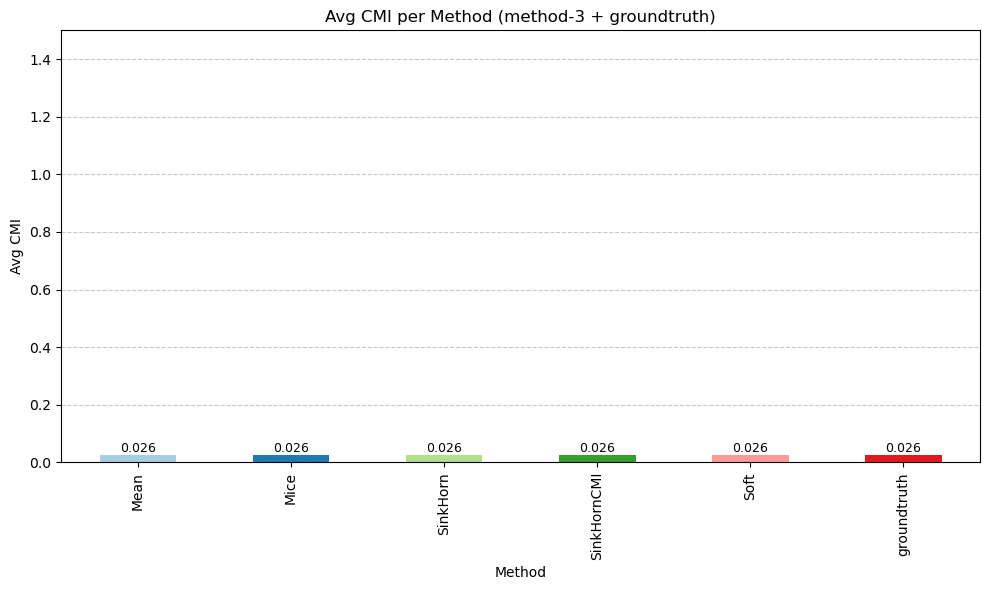

In [8]:


# # Compute mean of ground-truth CMI for method-3
# groundtruth_mean = np.mean(run1_method3_original_cmi)

# # Step 0: Base condition: train_triplet ≠ 0 and cmi-method == "method-3"
# base_mask = (run1_results.iloc[:, 2] != 0) & (run1_results.iloc[:, 6] == "method-3")

# # Step 1: Specific masks
# sinkhorncmi0_mask = (run1_results.iloc[:, 0] == "SinkHornCMI0") & base_mask & (run1_results.iloc[:, 1] == 3)
# sinkhorncmi_mask = (run1_results.iloc[:, 0] == "SinkHornCMI") & base_mask & (run1_results.iloc[:, 1] == 3)
# other_methods_mask = (~run1_results.iloc[:, 0].isin(["SinkHornCMI", "SinkHornCMI0"])) & base_mask

# # Apply filters
# filtered_run1_results = pd.concat([
#     run1_results[sinkhorncmi0_mask],
#     run1_results[sinkhorncmi_mask],
#     run1_results[other_methods_mask]
# ])

# # Group by method and calculate mean of CMI (col 6)
# mean_cmi_by_method = filtered_run1_results.groupby(filtered_run1_results.columns[0])[filtered_run1_results.columns[7]].mean()

# # Add groundtruth entry
# mean_cmi_by_method["groundtruth"] = groundtruth_mean

# # Sort and plot
# sorted_cmi = mean_cmi_by_method.sort_values()

# plt.figure(figsize=(10, 6))
# colors = plt.cm.Paired.colors
# ax = sorted_cmi.plot(kind='bar', color=colors[:len(sorted_cmi)])

# # Value labels
# for p in ax.patches:
#     height = p.get_height()
#     ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2., height),
#                 ha='center', va='bottom', fontsize=9)

# plt.ylabel("Avg CMI")
# plt.xlabel("Method")
# plt.ylim(0, 1.5)
# plt.title("Avg CMI per Method (method-3 + groundtruth)")
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

In [9]:
# # Method-wise mean extractor
# def extract_cmi_summary(df, method_number):
#     base_mask = (df.iloc[:, 7] != 0) & (df.iloc[:, 4] == f"method-{method_number}")
#     sinkhorncmi0_mask = (df.iloc[:, 0] == "SinkHornCMI0") & base_mask & (df.iloc[:, 6] == method_number)
#     sinkhorncmi_mask = (df.iloc[:, 0] == "SinkHornCMI") & base_mask & (df.iloc[:, 8] == method_number)
#     other_methods_mask = (~df.iloc[:, 0].isin(["SinkHornCMI", "SinkHornCMI0"])) & base_mask
#     filtered = pd.concat([df[sinkhorncmi0_mask], df[sinkhorncmi_mask], df[other_methods_mask]])
#     summary = filtered.groupby(df.columns[0])[df.columns[5]].mean()
#     return summary

In [10]:
# # Average across all groundtruth values
# all_method1_gt = run1_method1_original_cmi + run2_method1_original_cmi + run3_method1_original_cmi + run4_method1_original_cmi + run5_method1_original_cmi
# groundtruth_mean = np.mean(all_method1_gt)

# # Add groundtruth row directly after combining summaries
# combined_df = pd.DataFrame({
#     "run1": extract_cmi_summary(run1_results, 1),
#     "run2": extract_cmi_summary(run2_results, 1),
#     "run3": extract_cmi_summary(run3_results, 1),
#     "run4": extract_cmi_summary(run4_results, 1),
#     "run5": extract_cmi_summary(run5_results, 1),
# })

# # Insert groundtruth row with repeated mean value across runs
# combined_df.loc["groundtruth"] = [groundtruth_mean] * 5

# # Compute mean and std
# methods_summary = combined_df.copy()
# methods_summary["mean_across_runs"] = methods_summary.mean(axis=1)
# methods_summary["std_across_runs"] = methods_summary.std(axis=1)

# final_stats_with_gt = methods_summary[["mean_across_runs", "std_across_runs"]]
# with pd.option_context('display.float_format', '{:.20f}'.format):
#     print(final_stats_with_gt)

In [11]:
# # Create a boxplot from CMI values across 5 runs for each method
# plt.figure(figsize=(10, 6))

# # Transpose to have methods on x-axis and 5 CMI values per method as data points
# combined_df.T.boxplot()

# plt.ylabel("CMI")
# plt.xlabel("Imputation Method")
# plt.title("CMI Distribution Across 5 Runs (method-1)")
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

In [12]:
# # Average across all method-2 groundtruth values
# all_method2_gt = run1_method2_original_cmi + run2_method2_original_cmi + run3_method2_original_cmi + run4_method2_original_cmi + run5_method2_original_cmi
# groundtruth_mean2 = np.mean(all_method2_gt)

# # Collect summaries
# combined_df2 = pd.DataFrame({
#     "run1": extract_cmi_summary(run1_results, 2),
#     "run2": extract_cmi_summary(run2_results, 2),
#     "run3": extract_cmi_summary(run3_results, 2),
#     "run4": extract_cmi_summary(run4_results, 2),
#     "run5": extract_cmi_summary(run5_results, 2),
# })

# # Add groundtruth
# combined_df2.loc["groundtruth"] = [groundtruth_mean2] * 5

# # Compute stats
# methods_summary2 = combined_df2.copy()
# methods_summary2["mean_across_runs"] = methods_summary2.mean(axis=1)
# methods_summary2["std_across_runs"] = methods_summary2.std(axis=1)

# # Display and plot
# final_stats_with_gt2 = methods_summary2[["mean_across_runs", "std_across_runs"]]

# with pd.option_context('display.float_format', '{:.6f}'.format):
#     print(final_stats_with_gt2)


# plt.figure(figsize=(10, 6))
# combined_df2.T.boxplot()
# plt.ylabel("CMI")
# plt.xlabel("Imputation Method")
# plt.title("CMI Distribution Across 5 Runs (method-2)")
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()


In [13]:
# # Average across all method-3 groundtruth values
# all_method3_gt = run1_method3_original_cmi + run2_method3_original_cmi + run3_method3_original_cmi + run4_method3_original_cmi + run5_method3_original_cmi
# groundtruth_mean3 = np.mean(all_method3_gt)


# # Retry method-3 computation and boxplot
# combined_df3 = pd.DataFrame({
#     "run1": extract_cmi_summary(run1_results, 3),
#     "run2": extract_cmi_summary(run2_results, 3),
#     "run3": extract_cmi_summary(run3_results, 3),
#     "run4": extract_cmi_summary(run4_results, 3),
#     "run5": extract_cmi_summary(run5_results, 3),
# })

# # Add groundtruth
# combined_df3.loc["groundtruth"] = [groundtruth_mean3] * 5

# # Compute stats
# methods_summary3 = combined_df3.copy()
# methods_summary3["mean_across_runs"] = methods_summary3.mean(axis=1)
# methods_summary3["std_across_runs"] = methods_summary3.std(axis=1)

# # Display and plot
# final_stats_with_gt3 = methods_summary3[["mean_across_runs", "std_across_runs"]]

# plt.figure(figsize=(10, 6))
# combined_df3.T.boxplot()
# plt.ylabel("CMI")
# plt.xlabel("Imputation Method")
# plt.title("CMI Distribution Across 5 Runs (method-3)")
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.show()

# final_stats_with_gt3